<a href="https://colab.research.google.com/github/ayushtankha/NRC-Data-Analysis/blob/main/NRC_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARSING THROUGH A TCX FILE USING TREES**

In [ ]:
tree = ET.parse(filename)
root = tree.getroot()

print("Moving through elements by index")
for i in root[0]:
  print(i)

Moving through elements by index
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Activity' at 0x7f320b8d81d0>


In [ ]:
print("First Activity")
for i in root[0][0]:
  print(i)

First Activity
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Id' at 0x7f320b8d8450>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x7f320b8d8c70>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions' at 0x7f320b80b360>


In [ ]:
print("Get values for Lap 1")
for child in root[0][0][1]:
  print(child.tag, child.text)

Get values for Lap 1
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}TotalTimeSeconds 1920.0
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters 4887.508549102944
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}MaximumSpeed 13.090771597943677
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Calories 319
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Intensity Active
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}TriggerMethod Manual
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Track None


In [ ]:
speed = root[0][0][1][2]
print("Maximum Speed is  ",  speed.text)

Maximum Speed is   13.090771597943677


###SAMPLE TESTING

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import dateutil.parser as dp
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

filename = '/content/drive/MyDrive/Nike Run Data/ffd8f778-bdf1-48b0-ba95-f1707a465913.tcx'

In [ ]:
tree = ET.parse(filename)
root = tree.getroot()

#Print out elements
for x in root:
    print(x)

<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Activities' at 0x7f3212cc9d10>


In [ ]:
print('First activity')
for x in root[0][0]:
    print(x)

First activity
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Id' at 0x7f3212cc9c70>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x7f320f643090>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions' at 0x7f320b70fef0>


In [ ]:
print('Get values for lap #1')
for child in root[0][0][1]:
    print(child.tag, child.text)

Get values for lap #1
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}TotalTimeSeconds 1920.0
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters 4887.508549102944
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}MaximumSpeed 13.090771597943677
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Calories 319
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Intensity Active
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}TriggerMethod Manual
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Track None


In [ ]:
calories= float(root[0][0][1][3].text)
print('Calories:', type(calories))

Calories: <class 'float'>


In [ ]:
print('Search by tag name')
run = root[0][0]
print(run.findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap'))

Search by tag name
[<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x7f320f643090>]


In [ ]:
for lap in run.findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap'):
    for trackpoint in lap[6].findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Trackpoint'):
        for child in trackpoint:
            print(child.tag, child.text)


{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Time 2018-11-03T12:53:46Z
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position None
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters 32.49680212906192
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions None
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Time 2018-11-03T13:00:37Z
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position None
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters 31.83335306493951
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions None
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Time 2018-11-03T13:07:42Z
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions None
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Time 2018-11-03T13:13:51Z
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions None
{http://www.garmin

In [ ]:
#Using Namespaces to organize code

NAMESPACES = {
    'ns': 'http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2',
    'ns2': 'http://www.garmin.com/xmlschemas/UserProfile/v2',
    'ns3': 'http://www.garmin.com/xmlschemas/ActivityExtension/v2',
    'ns4': 'http://www.garmin.com/xmlschemas/ProfileExtension/v1',
    'ns5': 'http://www.garmin.com/xmlschemas/ActivityGoals/v1'
}

print('Old way:', run.findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap'))

print('New way:', run.findall('ns:Lap', NAMESPACES))

Old way: [<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x7f320f643090>]
New way: [<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x7f320f643090>]


# **READING A TCX File**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import timedelta

from dateutil.parser import isoparse
from lxml import objectify
import xml.etree.ElementTree as ET
import pandas as pd
import dateutil.parser as dp
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [ ]:
!pip install tcxreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tcxreader.tcxreader import TCXReader, TCXTrackPoint

tcx_reader = TCXReader()
file_location = '/content/drive/MyDrive/NRC Data/1270605d-78cf-4721-ac5d-d6e7df5b2950.tcx'

data: TCXTrackPoint = tcx_reader.read(file_location)
k = data.trackpoints[0]
print(k)

Time:2020-10-27 01:06:10
Latitude:	28.6064054
Longitude:	77.29135806
Elevation:	None
Distance:	8.389999999999995
Heartrate:	None
Cadence:	None 
TPX Extensions: 
	Speed:5.700290650707695
#############################


In [ ]:
#Convert all string values into integer values in the data frame to make it operable 

In [ ]:
data1 = {'latitude': [], 'longitude': [], 'time': [],'Distance':[]}

for trackpoint in root.iter('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Trackpoint'):
    time = trackpoint.find('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Time').text
    distance = trackpoint.find('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters')
    position = trackpoint.find('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position')
    print(position)
    if position is not None:
        latitude = position.find('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}LatitudeDegrees').text
        longitude = position.find('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}LongitudeDegrees').text
        print(latitude)
    else:
      continue

    if distance is not None:
      d1 = trackpoint.find('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters').text
    else:
      continue
    data1['latitude'].append(latitude)
    data1['longitude'].append(longitude)
    data1['time'].append(time)
    data1['Distance'].append(d1)
    

<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320c7d9450>
28.61037228
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320b80c040>
28.60850125
None
None
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320b80c7c0>
28.60829009
None
None
None
None
None
None
None
None
None
None
None
None
None
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320b810950>
28.60856762
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320b810ea0>
28.60855454
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320b792450>
28.60849366
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320b7929a0>
28.60847151
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position' at 0x7f320b792ef0>
28.60842798
<Element '{http://www.garmin.com/xmls

In [ ]:
print(data1)

{'latitude': ['28.61037228', '28.60850125', '28.60829009', '28.60856762', '28.60855454', '28.60849366', '28.60847151', '28.60842798', '28.60839063', '28.60835744', '28.60831624', '28.60835527', '28.6083885', '28.60842854', '28.60844905', '28.60849031', '28.60854677', '28.60863901', '28.6087445', '28.60884326', '28.60895223', '28.60906545', '28.60916036', '28.60925167', '28.60934456', '28.60943041', '28.6095344', '28.60961782', '28.60971056', '28.60980814', '28.60988955', '28.60997555', '28.61006786', '28.61016158', '28.61024472', '28.61030192', '28.61032231', '28.61031414', '28.61028581', '28.610249', '28.61019045', '28.61015527', '28.6101257', '28.61007865', '28.61002935', '28.61001643', '28.60999664', '28.61008637', '28.61007667', '28.61010842', '28.6101614', '28.61016523', '28.61015876', '28.61019831', '28.61018899', '28.61019659', '28.61026137', '28.6104821', '28.61056865', '28.61067529', '28.6107637', '28.61085333', '28.610943', '28.61102994', '28.61112818', '28.61103894', '28.610

In [ ]:
df = pd.DataFrame.from_dict(data1)

In [ ]:
print(df)

        latitude    longitude                  time            Distance
0    28.61037228  77.28781427  2018-11-03T12:53:46Z   32.49680212906192
1    28.60850125  77.28880344  2018-11-03T13:00:37Z   31.83335306493951
2    28.60829009  77.28890737  2018-11-03T12:57:58Z   10.63532598211614
3    28.60856762  77.28868067  2018-11-03T12:48:49Z  28.600000000000236
4    28.60855454  77.28856034  2018-11-03T12:48:56Z   11.84975358792778
..           ...          ...                   ...                 ...
351  28.60911501  77.28900766  2018-11-03T13:18:54Z  10.152120838623269
352  28.60910265  77.28910985  2018-11-03T13:18:59Z  10.080689022028189
353  28.60913295  77.28900768  2018-11-03T13:19:08Z  25.351144944608883
354  28.60916192  77.28889207  2018-11-03T13:19:13Z  11.749854013548777
355  28.60912462  77.28879563  2018-11-03T13:19:20Z  10.299199878645915

[356 rows x 4 columns]


###CONVERTING DATAFRAME VALUES FROM STRING TO FLOAT


In [ ]:
df['latitude']= df['latitude'].astype(float)
df['longitude']= df['longitude'].astype(float)
df['time'] = pd.to_datetime(df['time'])
df['Distance']= df['Distance'].astype(float)



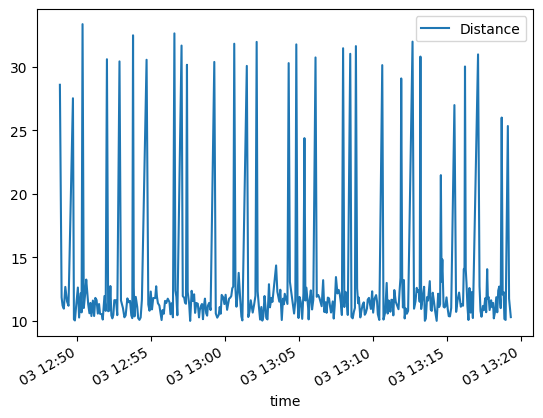

In [ ]:
df.plot(x='time', y='Distance', kind='line')
plt.show()

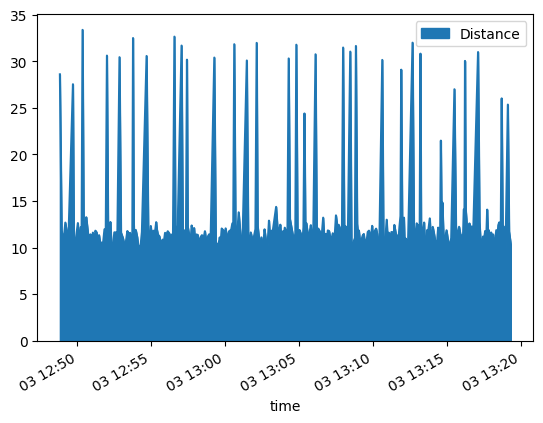

In [ ]:
df.plot(x='time', y='Distance', kind='area')
plt.show()

# **PLOTTING MY TRACK**


In [ ]:
!pip install descartes
!pip install geopandas
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=13)

# Add a line to the map object that connects the latitude and longitude points
folium.PolyLine(locations=df[['latitude', 'longitude']].values.tolist(), color='blue').add_to(m)

# Show the map
m

# **DATA PREPARATION**



In [ ]:
def extract_calories(filename):
  x = filename
  tree = ET.parse(filename)
  root = tree.getroot()
  calories=float(root[0][0][1][3].text)
  


extract_calories('/content/drive/MyDrive/NRC Data/01080eeb-c783-4ff1-8ff0-794a75a39432.tcx')


#Have to check if each file has calories or not so add the function for exception checking 

In [ ]:
dframe = pd.DataFrame(extract_calories('/content/drive/MyDrive/NRC Data/0fbfcc55-9a11-4ff6-91c7-8339d4ae2818.tcx'), columns=['Numbers'])

ValueError: ignored